[*********************100%%**********************]  1 of 1 completed

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Ticker: AAPL
Random Forest Accuracy: 0.48847926267281105

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.49      1.00      0.66       317
        True       1.00      0.00      0.01       334

    accuracy                           0.49       651
   macro avg       0.74      0.50      0.33       651
weighted avg       0.75      0.49      0.32       651


XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.49      0.91      0.64       317
        True       0.56      0.10      0.18       334

    accuracy                           0.50       651
   macro avg       0.53      0.51      0.41       651
weighted avg       0.53      0.50      0.40       651

XGBoost Accuracy: 0.500768049155146
Final Investment Value for Random Forest: 10233.982004271827
Returns on Investment for Random Forest: 2.3398200427182747
Final Investment Value for XGBoost: 10744.790753946043
Retu

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Ticker: MSFT
Random Forest Accuracy: 0.4946236559139785

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.49      0.97      0.65       320
        True       0.56      0.03      0.06       331

    accuracy                           0.49       651
   macro avg       0.52      0.50      0.36       651
weighted avg       0.52      0.49      0.35       651


XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.47      0.35      0.40       320
        True       0.50      0.62      0.55       331

    accuracy                           0.49       651
   macro avg       0.48      0.48      0.48       651
weighted avg       0.48      0.49      0.48       651

XGBoost Accuracy: 0.5130568356374808
Final Investment Value for Random Forest: 10395.525527641588
Returns on Investment for Random Forest: 3.955255276415883
Final Investment Value for XGBoost: 13261.367467386255
Retur

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Ticker: ^GSPC
Random Forest Accuracy: 0.5023041474654378

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.49      0.95      0.65       313
        True       0.66      0.09      0.15       338

    accuracy                           0.50       651
   macro avg       0.58      0.52      0.40       651
weighted avg       0.58      0.50      0.39       651


XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.49      0.95      0.65       313
        True       0.65      0.09      0.16       338

    accuracy                           0.50       651
   macro avg       0.57      0.52      0.40       651
weighted avg       0.57      0.50      0.39       651

XGBoost Accuracy: 0.4976958525345622
Final Investment Value for Random Forest: 11292.413639242617
Returns on Investment for Random Forest: 12.92413639242617
Final Investment Value for XGBoost: 11362.740345462482
Retu

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Ticker: ^NSEI
Random Forest Accuracy: 0.47318611987381703

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.45      0.92      0.61       279
        True       0.66      0.12      0.21       355

    accuracy                           0.47       634
   macro avg       0.55      0.52      0.41       634
weighted avg       0.57      0.47      0.38       634


XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.45      0.90      0.60       279
        True       0.65      0.15      0.25       355

    accuracy                           0.48       634
   macro avg       0.55      0.52      0.42       634
weighted avg       0.56      0.48      0.40       634

XGBoost Accuracy: 0.5205047318611987
Final Investment Value for Random Forest: 12992.593297483534
Returns on Investment for Random Forest: 29.92593297483534
Final Investment Value for XGBoost: 13204.318028657257
Ret

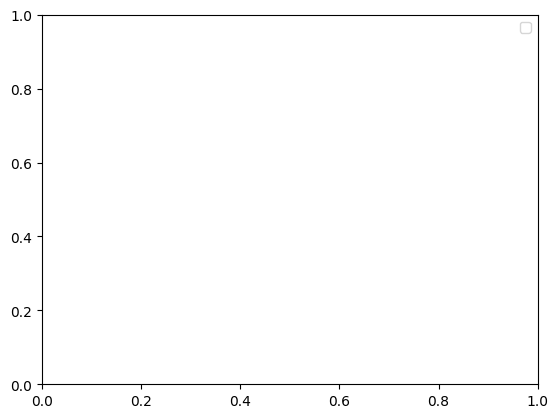

In [48]:
import pandas as pd
import numpy as np
from finta import TA

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

def add_technical_indicators(data):
    data['RSI'] = calculate_rsi(data['Close'])
    data['Upper_Band'], data['Lower_Band'] = calculate_bollinger_bands(data['Close'])
    return data.dropna()



import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt

tickers = ['AAPL', 'MSFT', '^GSPC', '^NSEI']
initial_investment = 10000

for ticker in tickers:
    data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
    plt.legend()
    # to get rid of a warning 
    data = data.copy()

    data = add_technical_indicators(data)

    data['Target'] = data['Close'].shift(-1) > data['Close']
    data = data.dropna()

    X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'Upper_Band', 'Lower_Band']]
    y = data['Target']

    train_size = int(0.8*len(data))
    X_train = X[:train_size]
    y_train = y[:train_size]
    X_test = X[train_size:]
    y_test = y[train_size:]

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)

    rf_predictions = rf_model.predict(X_test)
    xgb_predictions = xgb_model.predict(X_test)

    print(f"Ticker: {ticker}")
    print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
    print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))
    print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))
    print("XGBoost Accuracy:", mean_squared_error(y_test, xgb_predictions))

    current_investment = initial_investment
    shares_held = 0
    for i in range(len(rf_predictions)):
        if rf_predictions[i] and shares_held == 0:
            shares_held = current_investment / share_price.iloc[i]
            current_investment = 0  # Invested all in shares
    
        elif not rf_predictions[i] and shares_held > 0:
            current_investment = shares_held * share_price.iloc[i]
            shares_held = 0  # Sold all shares

    final_investment_rf = current_investment + shares_held * X_test['Close'].iloc[-1]
    returns_rf = final_investment_rf - initial_investment
    print("Final Investment Value for Random Forest:", final_investment_rf)
    print("Returns on Investment for Random Forest:", returns_rf/100)

    current_investment2 = initial_investment
    shares_held2 = 0
    for i in range(len(xgb_predictions)):
        if xgb_predictions[i] and shares_held2 == 0:
            shares_held2 = current_investment2 / share_price.iloc[i]
            current_investment2 = 0  # Invested all in shares
        
        elif not xgb_predictions[i] and shares_held2 > 0:
            current_investment2 = shares_held2 * share_price.iloc[i]
            shares_held2 = 0  # Sold all shares

    final_investment_xgb = current_investment2 + shares_held2 * X_test['Close'].iloc[-1]
    returns_xgb = final_investment_xgb - initial_investment
    print("Final Investment Value for XGBoost:", final_investment_xgb)
    print("Returns on Investment for XGBoost:", returns_xgb/100)
    


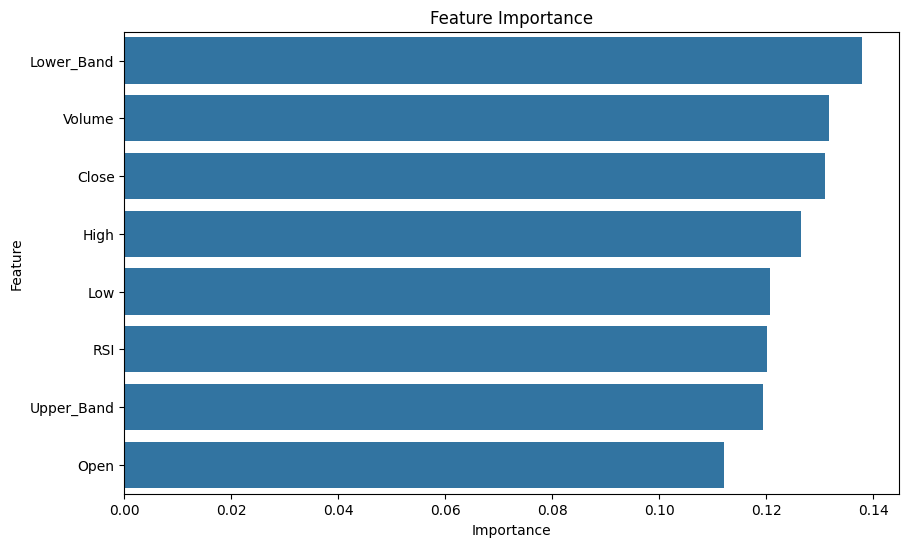

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf_model is your trained RandomForestClassifier
feature_importances = xgb_model.feature_importances_

# Getting feature names from your dataset
feature_names = X_train.columns

# Creating a DataFrame for visualization
importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sorting the features based on importance
importances = importances.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [44]:
X_test

,Open,High,Low,Close,Volume,RSI,MA
Date,,,,,,,
2020-06-15,9919.349609,9943.349609,9726.349609,9813.700195,716100,71.346947,54.520704
2020-06-16,10014.799805,10046.150391,9728.500000,9914.000000,899900,68.128293,57.029632
2020-06-17,9876.700195,10003.599609,9833.799805,9881.150391,685400,62.949120,55.941152
2020-06-18,9863.250000,10111.200195,9845.049805,10091.650391,622900,65.683186,61.068865
2020-06-19,10119.000000,10272.400391,10072.650391,10244.400391,892100,63.604720,64.314476
...,...,...,...,...,...,...,...
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,176700,32.273146,40.672810
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,214300,38.152960,44.800308
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,193900,36.232800,44.522543


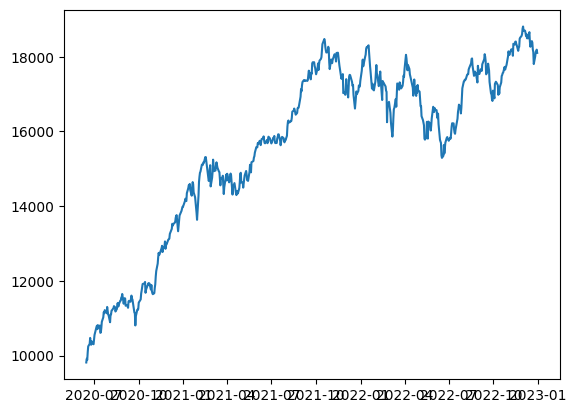

In [47]:
plt.plot(X_test['Close'])